# Sales Analysis

#### Import Necessary Libraries

In [2]:
import pandas as pd
import os

#### Merge the 12 months of sales data into a single CSV file

In [3]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' +file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)


##### Read in updated dataframe

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Data Cleaning

In [6]:
# Find the rows of NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop rows of NaN
# Double check the dataset again for the NaN
all_data = all_data.dropna(how='all')
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Find 'Or' and remove it  
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [9]:
# Convert data type to int32 for the 'Quantity Order' & 'Price Each' columns
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Augment data with additional columns

In [10]:
# Add 'Month' column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [12]:
# Add 'Sales' column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [13]:
# Add 'City' Column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Question 1: What was the best month for sales? How much was earned that month?

In [14]:
results_by_month = all_data.groupby('Month')['Sales'].sum().reset_index()
results_by_month

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


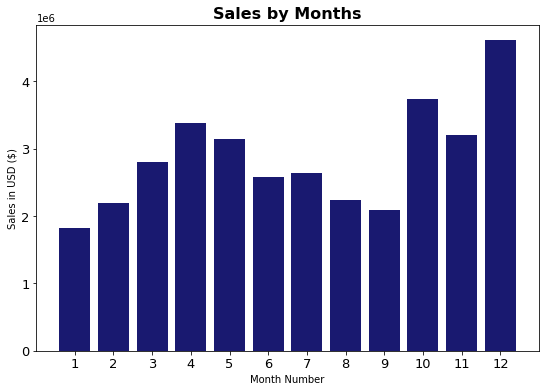

In [15]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.figure(figsize = (9, 6))
plt.bar(months, height= results_by_month['Sales'], color= 'midnightblue')
plt.xticks(months, fontsize = 13)
plt.yticks(fontsize= 13)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.title("Sales by Months", fontsize = 16, fontweight = "bold")
plt.show()


#### Question 2: What city has the highest number of sales?

In [16]:
results_by_city = all_data.groupby('City')['Sales'].sum().reset_index()
results_by_city

,City,Sales
0,Atlanta (GA),2795498.58
1,Austin (TX),1819581.75
2,Boston (MA),3661642.01
3,Dallas (TX),2767975.40
4,Los Angeles (CA),5452570.80
5,New York City (NY),4664317.43
6,Portland (ME),449758.27
7,Portland (OR),1870732.34
8,San Francisco (CA),8262203.91
9,Seattle (WA),2747755.48


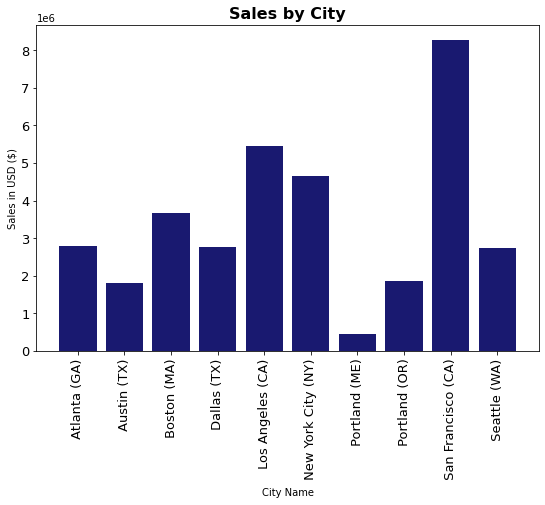

In [17]:
plt.figure(figsize= (9, 6))
plt.bar(x= results_by_city['City'], height= results_by_city['Sales'], color= 'midnightblue')
plt.xticks(results_by_city['City'], rotation = 'vertical', fontsize = 13)
plt.yticks(fontsize= 13)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.title("Sales by City", fontsize = 16, fontweight = "bold")
plt.show()

#### Question 3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


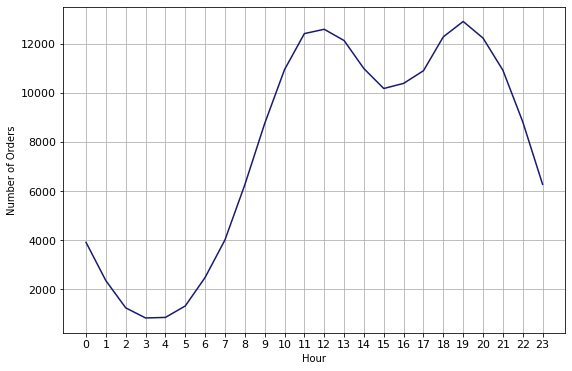

In [19]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize= (9,6))
plt.plot(hours, all_data.groupby('Hour')['Quantity Ordered'].count(), color= 'midnightblue')
plt.xticks(hours, fontsize= 11)
plt.yticks(fontsize= 11)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()
# Based on the line graph below, my recommendation is around 11am (11) and 7pm (19)

#### Question 4: What products are most often sold together?

In [20]:
# Find the Order ID that purchased more than 1 item
# Create a new column 'Grouped' which combine the products together for each Order ID
# Drop all the duplicate Order ID rows after combined
df = all_data[all_data['Order ID'].duplicated(keep= False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(10)

/var/folders/dn/_1m428bj19g8c21t1767j7wm0000gn/T/ipykernel_97206/948455385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [21]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)
# Based on the result, we can conclude that 'iPhone' & 'Lightning Cable' products are the most often sold together

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Question 5: What product sold the most? Why?

In [32]:
result_by_product = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
result_by_product

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [34]:
mean_prices = all_data.groupby('Product')['Price Each'].mean()
mean_prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/dn/_1m428bj19g8c21t1767j7wm0000gn/T/ipykernel_97206/2818751965.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result_by_product['Product'], rotation= 'vertical', fontsize= 10)


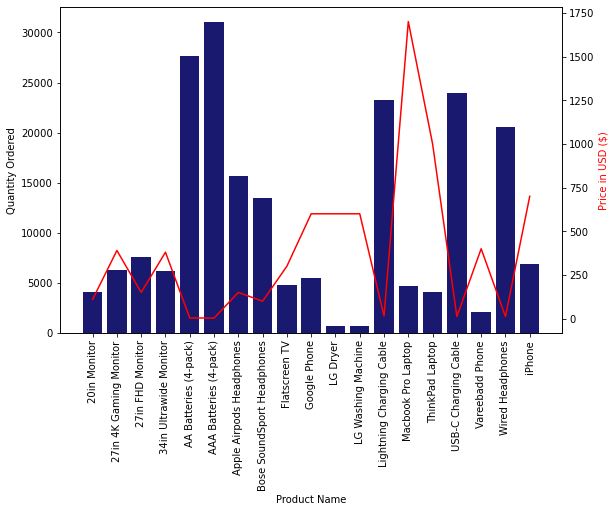

In [50]:
# Plot a bar chart with secondary y-axis (Mean Price)
# Add secondary y-axis into the existing bar graph
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots(figsize= (9,6))

ax2 = ax1.twinx()
ax1.bar(result_by_product['Product'], result_by_product['Quantity Ordered'], color= 'midnightblue')
ax2.plot(result_by_product['Product'], mean_prices, color = 'r')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='k')
ax2.set_ylabel('Price in USD ($)', color='r')
ax1.set_xticklabels(result_by_product['Product'], rotation= 'vertical', fontsize= 10)
plt.show()

In [51]:
#### The above graph shows that the "AAA Batteries" product sold the most because of the low pricing